<a href="https://colab.research.google.com/github/dansek-dj/TensorFlowPractice/blob/main/SignRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies and setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheC

In [3]:
import tensorflow as tf
import os

In [4]:
# Aoid OOM(out-of memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU') #lists all the GPUs available, use CPU instead of GPU in arg to get CPU info
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

##Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Tensorflow/Images'

In [8]:
os.listdir(data_dir)

['Happy', 'Sad']

In [9]:
os.listdir(os.path.join(data_dir, 'Happy'))

['image18.jpeg',
 'image16.jpeg',
 'image17.jpeg',
 'image22.jpeg',
 'image23.jpeg',
 'image29.jpeg',
 'what-makes-people-happy1.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'images6.jpg',
 'what-makes-people-happy.jpeg',
 '1920px-face-smile.svg_.png',
 '_happy_jumping_on_beach-40815.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'images21.jpg',
 'images11.jpg',
 'images13.jpg',
 'happy-person.jpeg',
 'happy-people-vector-839522.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 'images16.jpg',
 'Happy.jpg',
 'images25.jpg',
 'png-clipart-happiness-graphy-smile-happy-people-love-photography.png',
 'images30.jpg',
 'how-happy-are-healthy-people.jpg',
 'Happy-Guy.jpg',
 'images27.jpg',
 'images32.jpg',
 'happyball-3.jpg',
 'Successful-year.jpg',
 'images41.jpg',
 'WorldHappinessReport_620.jpg',
 'A_Sep20_14_1189155141.jpg',
 'images34.jpg',
 'images36.jpg',
 '1-2.jpg',
 'images44.jpg',
 'GettyImages-565706549-949x534.jpg',
 '960x0.jpg',
 'happy-indians_5f66fd46d9f5b.jpg'

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

#Load Data

In [12]:
import numpy as np
import matplotlib.pyplot as plt

###Automatically label the images to different classes based on the folders

In [13]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Tensorflow/Images') 
#also resizes the images to 256x256 by default
#and batch size to 32

Found 237 files belonging to 2 classes.


In [14]:
data #Data is converted into a generator

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
data_iterator

In [17]:
batch = data_iterator.next()

In [18]:
batch

(array([[[[ 41.941406 ,  76.69214  , 229.77002  ],
          [ 39.58789  ,  71.60034  , 226.04102  ],
          [ 40.239014 ,  67.29224  , 231.4248   ],
          ...,
          [ 42.328125 ,  68.5      , 180.7251   ],
          [ 35.737793 ,  71.5708   , 182.91309  ],
          [ 31.769775 ,  67.31714  , 185.1206   ]],
 
         [[ 44.968018 ,  83.96631  , 227.87085  ],
          [ 43.461426 ,  76.53955  , 231.66772  ],
          [ 40.166504 ,  68.90454  , 232.63892  ],
          ...,
          [ 38.886963 ,  66.27759  , 184.23438  ],
          [ 49.671387 ,  70.84375  , 190.81567  ],
          [ 40.879883 ,  71.163574 , 187.77124  ]],
 
         [[ 51.881348 ,  96.33862  , 233.05737  ],
          [ 48.09375  ,  81.329834 , 235.06763  ],
          [ 42.87549  ,  72.18701  , 231.46875  ],
          ...,
          [ 36.929443 ,  67.77222  , 187.85034  ],
          [ 37.541748 ,  68.44946  , 191.3418   ],
          [ 38.71118  ,  70.86743  , 190.85522  ]],
 
         ...,
 
         [[ 

In [19]:
len(batch) # Length is 2 coz the batch has the image as 1 No. and the label as 1 No. {Image + Label = 1+1 = 2}

2

In [20]:
batch[0].shape #32 pictures of size 256 x 256 and RGB color

(32, 256, 256, 3)

In [21]:
batch[1] #the numbers are the classes of the images Happy or Sad

#But which is Happy or Sad?...

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

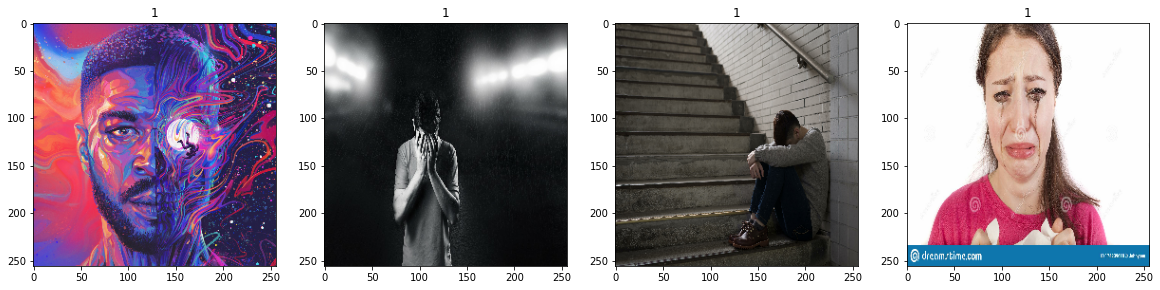

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#Happy is 0 and Sad is 1. 
#Labels can also be configured in image_dataset_from_directory

#Preprocess the data

##Scale the data

In [23]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

In [24]:
'''The values range from 0 to 255. Ideally the data should be within the range 0-1
for the model to run efficiently'''

data = data.map(lambda x,y : (x/255.0, y)) #x is the image and y the label

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [25]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
batch = scaled_iterator.next()

In [27]:
batch[0].min(), batch[0].max()

(0.0, 1.0)

##Train Test Split

In [28]:
print(f'The total number of batches are :{len(data)}\nImages in 7 batches :{7*32}\nImages in 8 batches :{8*32}') 
#We have 7 batches of 32 images in each and the remaining 13 images are in the 8th batch

7*32+13 == 237 

The total number of batches are :8
Images in 7 batches :224
Images in 8 batches :256


True

In [29]:
#Finding how many batches in each set
train_size = int(len(data)*0.7)
val_size = int(round(len(data)*0.2))
test_size = int(round(len(data)*0.1))

train_size, val_size, test_size

(5, 2, 1)

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#Build Deep Learning Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3))) #16 Filters of 3x3 size, 1 Stride
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
model.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics = ['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

##Train

In [39]:
logdir = '/content/drive/MyDrive/Colab Notebooks/Tensorflow/logs'

In [40]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [41]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks=[tensorboard_callback, callback])

Epoch 1/20
5/5 [==============================] - 26s 4s/step - loss: 0.6798 - accuracy: 0.6500 - val_loss: 0.6980 - val_accuracy: 0.4688
Epoch 2/20
5/5 [==============================] - 29s 4s/step - loss: 0.6529 - accuracy: 0.6375 - val_loss: 0.6060 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 27s 5s/step - loss: 0.7130 - accuracy: 0.6125 - val_loss: 0.6247 - val_accuracy: 0.6562
Epoch 4/20
5/5 [==============================] - 21s 4s/step - loss: 0.6364 - accuracy: 0.6250 - val_loss: 0.6555 - val_accuracy: 0.6094
Epoch 5/20
5/5 [==============================] - 26s 5s/step - loss: 0.6114 - accuracy: 0.6875 - val_loss: 0.5289 - val_accuracy: 0.7656
Epoch 6/20
5/5 [==============================] - 26s 5s/step - loss: 0.5532 - accuracy: 0.7063 - val_loss: 0.5171 - val_accuracy: 0.7969
Epoch 7/20
5/5 [==============================] - 26s 5s/step - loss: 0.4944 - accuracy: 0.7875 - val_loss: 0.3787 - val_accuracy: 0.8438
Epoch 8/20
5/5 [==================

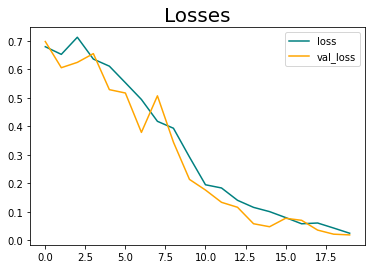

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label='val_loss')
plt.title('Losses', fontsize = 20)
plt.legend()

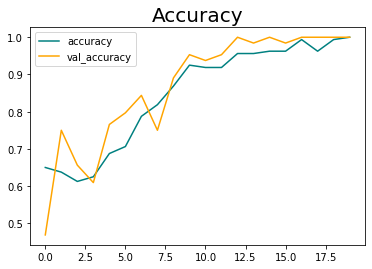

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label='val_accuracy')
plt.title('Accuracy', fontsize = 20)
plt.legend()

#Evaluate the model

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator():
  X, y = batch
  y_pred = model.predict(X)
  pre.update_state(y, y_pred)
  re.update_state(y, y_pred)
  acc.update_state(y, y_pred)

1/1 [==============================] - 1s 512ms/step


In [47]:
print(f'Precision: {pre.result().numpy()}\nRecall:{re.result().numpy()}\nAccuracy:{acc.result().numpy()}')

Precision: 1.0
Recall:1.0
Accuracy:1.0


##Test the model on unseen data

In [48]:
import cv2

In [100]:
Test_image = '/content/drive/MyDrive/Colab Notebooks/Tensorflow/hp4.jpg'

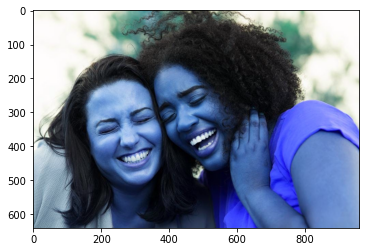

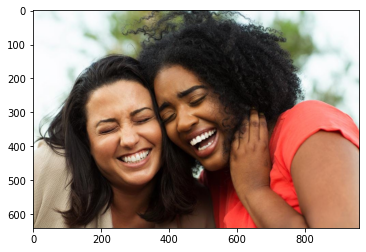

In [101]:
img = cv2.imread(Test_image)
plt.imshow(img) #CV reads the format in BGR instead of RGB hence red and blue are inversed
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

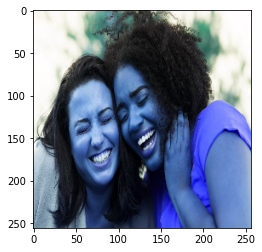

In [102]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
y_pred = model.predict(tf.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 42ms/step


In [104]:
y_pred

array([[0.2973866]], dtype=float32)

In [105]:
if y_pred <= 0.5:
  print('Its a Happy Image')
else: print('Sad Image')

Its a Happy Image


#Save the model

In [106]:
from tensorflow.keras.models import load_model

In [107]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [108]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [109]:
y_pred_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 104ms/step


In [110]:
if y_pred_new <= 0.5:
  print('Its a Happy Image')
else: print ('Sad Image')

Its a Happy Image
